## Online Retail Store Purchase Pattern Analysis & Predictive Consumer Behavior Study

**DATA AND LIBRARY IMPORTATION**

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from mlxtend.frequent_patterns import apriori, association_rules

In [27]:
def read_csv(path):
    df = pd.read_csv( path)
    
    return df

path = "C:/Users/nexwa/Downloads/online_retail_cart_data.csv"

df = read_csv (path)
df.head()

,User ID,Username,Last Purchase Date,Transaction ID,Shipping Address,Gender,Cart History
0,c1a61fec-8881-4b3b-8dc2-acb8687c3baa,Achieng Johnson,2024-12-05,0488db9b-8f6b-43d1-9977-1a3420f38d8d,"Eldoret, Kenya",Male,"Perfume, Body Lotion, Deodorant"
1,0d72cbd2-b56f-40fb-b65b-dd7f7b1c0417,David May,2024-07-02,7d025c53-604c-4cad-b7d4-3938c01f8348,"Nyeri, Kenya",Male,"Smartphone, Phone Case, Screen Protector"
2,7b4e3d24-b2d6-4c94-ae79-157a8832c7f8,Rajesh Collins,2024-12-10,682a3ad4-8a00-4de5-8269-89195e0efc5c,"Kisumu, Kenya",Male,"Laptop, Mouse, Keyboard"
3,462ca944-b53a-49f7-9f63-0103936f2a36,Robert Williams,2023-09-03,8d1d6d1f-67bd-434e-a7b4-dbc1abaeb19c,"Nairobi, Kenya",Other,"Perfume, Body Lotion, Deodorant"
4,91d18840-2af5-4d49-b571-406ee8204e92,David Sanchez,2023-11-18,a654a951-3c78-4c85-9e28-105c2954f0da,"Kisumu, Kenya",Other,"Shampoo, Conditioner, Hair Oil"


In [28]:
def get_cart_items(df):
    cart_items = df["Cart History"].str.split(",", expand =True)
    df = pd.DataFrame(cart_items)
    
    return df
df = get_cart_items(df)
df.head()

,0,1,2
0,Perfume,Body Lotion,Deodorant
1,Smartphone,Phone Case,Screen Protector
2,Laptop,Mouse,Keyboard
3,Perfume,Body Lotion,Deodorant
4,Shampoo,Conditioner,Hair Oil


In [29]:
def preprocess(df):
    df = pd.get_dummies(df)
    
    return df

df = preprocess(df)
df.head()

,0_Earphones,0_Laptop,0_Milk,0_Notebook,0_Perfume,0_Rice,0_Shampoo,0_Shirt,0_Shoes,0_Smartphone,...,2_ Belt,2_ Butter,2_ Deodorant,2_ Hair Oil,2_ Keyboard,2_ Power Bank,2_ Screen Protector,2_ Shoe Polish,2_ Sticky Notes,2_ Sugar
0,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [30]:
def predict_frequent_itemsets(df):
    freq_items = apriori(df, min_support =0.003, use_colnames =True)
    print (freq_items)
    
    return freq_items

freq_items = predict_frequent_itemsets(df)

     support                                           itemsets
0   0.097667                                      (0_Earphones)
1   0.101667                                         (0_Laptop)
2   0.108333                                           (0_Milk)
3   0.102333                                       (0_Notebook)
4   0.096667                                        (0_Perfume)
..       ...                                                ...
65  0.100333                 (0_Rice, 2_ Sugar, 1_ Cooking Oil)
66  0.104000           (0_Shampoo, 1_ Conditioner, 2_ Hair Oil)
67  0.095667                    (0_Shirt, 2_ Belt, 1_ Trousers)
68  0.098000                (0_Shoes, 1_ Socks, 2_ Shoe Polish)
69  0.095333  (0_Smartphone, 2_ Screen Protector, 1_ Phone C...

[70 rows x 2 columns]


In [31]:
def get_association_rules (freq_items):
    # Generating association rules
    rules = association_rules(freq_items, metric="confidence", min_threshold=0.5)

    # Display the top association rules
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

    return rules

rules = get_association_rules(freq_items)

                              antecedents  \
0                           (0_Earphones)   
1                      (1_ Phone Charger)   
2                           (0_Earphones)   
3                         (2_ Power Bank)   
4                              (1_ Mouse)   
..                                    ...   
115         (0_Smartphone, 1_ Phone Case)   
116  (2_ Screen Protector, 1_ Phone Case)   
117                        (0_Smartphone)   
118                 (2_ Screen Protector)   
119                       (1_ Phone Case)   

                              consequents   support  confidence       lift  
0                      (1_ Phone Charger)  0.097667         1.0  10.238908  
1                           (0_Earphones)  0.097667         1.0  10.238908  
2                         (2_ Power Bank)  0.097667         1.0  10.238908  
3                           (0_Earphones)  0.097667         1.0  10.238908  
4                              (0_Laptop)  0.101667         1.0   9.836066

In [38]:
rules.iloc[:,:6]

,antecedents,consequents,antecedent support,consequent support,support,confidence
0,(0_Earphones),(1_ Phone Charger),0.097667,0.097667,0.097667,1.0
1,(1_ Phone Charger),(0_Earphones),0.097667,0.097667,0.097667,1.0
2,(0_Earphones),(2_ Power Bank),0.097667,0.097667,0.097667,1.0
3,(2_ Power Bank),(0_Earphones),0.097667,0.097667,0.097667,1.0
4,(1_ Mouse),(0_Laptop),0.101667,0.101667,0.101667,1.0
...,...,...,...,...,...,...
115,"(0_Smartphone, 1_ Phone Case)",(2_ Screen Protector),0.095333,0.095333,0.095333,1.0
116,"(2_ Screen Protector, 1_ Phone Case)",(0_Smartphone),0.095333,0.095333,0.095333,1.0
117,(0_Smartphone),"(2_ Screen Protector, 1_ Phone Case)",0.095333,0.095333,0.095333,1.0
118,(2_ Screen Protector),"(0_Smartphone, 1_ Phone Case)",0.095333,0.095333,0.095333,1.0


In [44]:
import dash
from dash import dcc, html, dash_table
import pandas as pd

# Initialize Dash app
app = dash.Dash(__name__)

# Association rules data
rules = [
    {"Antecedent": ["Earphones"], "Consequent": ["Phone Charger"], "Support": 0.097667, "Confidence": 1.0},
    {"Antecedent": ["Phone Charger"], "Consequent": ["Earphones"], "Support": 0.097667, "Confidence": 1.0},
    {"Antecedent": ["Earphones"], "Consequent": ["Power Bank"], "Support": 0.097667, "Confidence": 1.0},
    {"Antecedent": ["Power Bank"], "Consequent": ["Earphones"], "Support": 0.097667, "Confidence": 1.0},
    {"Antecedent": ["Mouse"], "Consequent": ["Laptop"], "Support": 0.101667, "Confidence": 1.0},
    {"Antecedent": ["Smartphone", "Phone Case"], "Consequent": ["Screen Protector"], "Support": 0.095333, "Confidence": 1.0},
    {"Antecedent": ["Screen Protector", "Phone Case"], "Consequent": ["Smartphone"], "Support": 0.095333, "Confidence": 1.0}
]

# Convert to DataFrame for easy display
df = pd.DataFrame(rules)
df["Antecedent"] = df["Antecedent"].apply(lambda x: " + ".join(x))
df["Consequent"] = df["Consequent"].apply(lambda x: " + ".join(x))
df["Support"] = df["Support"].apply(lambda x: f"{x * 100:.2f}%")
df["Confidence"] = df["Confidence"].apply(lambda x: f"{x * 100:.0f}%")

# Layout of the app
app.layout = html.Div([
    html.H2("Electronic Product Association Rules", style={'textAlign': 'center'}),
    dash_table.DataTable(
        columns=[
            {"name": "If Customer Buys", "id": "Antecedent"},
            {"name": "Then They Also Buy", "id": "Consequent"},
            {"name": "Support", "id": "Support"},
            {"name": "Confidence", "id": "Confidence"}
        ],
        data=df.to_dict("records"),
        style_table={'overflowX': 'auto'},
        style_header={"backgroundColor": "#f8faf8", "fontWeight": "bold"},
        style_cell={"textAlign": "left", "padding": "10px"},
    )
])

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)


c:\Users\nexwa\anaconda3\envs\DataScience\Lib\site-packages\dash\dash.py:2282: DeprecationWarning:

Dash.run_server is deprecated and will be removed in Dash 3.0

c:\Users\nexwa\anaconda3\envs\DataScience\Lib\site-packages\dash\dash.py:1814: DeprecationWarning:

'pkgutil.find_loader' is deprecated and slated for removal in Python 3.14; use importlib.util.find_spec() instead



Key patterns in the data:

Basic Electronics Pairs:

Earphones ↔ Phone Charger (9.77% of transactions)
Earphones ↔ Power Bank (9.77% of transactions)
Mouse ↔ Laptop (10.17% of transactions)


Phone Accessory Bundle:

Smartphone + Phone Case → Screen Protector (9.53% of transactions)
Screen Protector + Phone Case → Smartphone

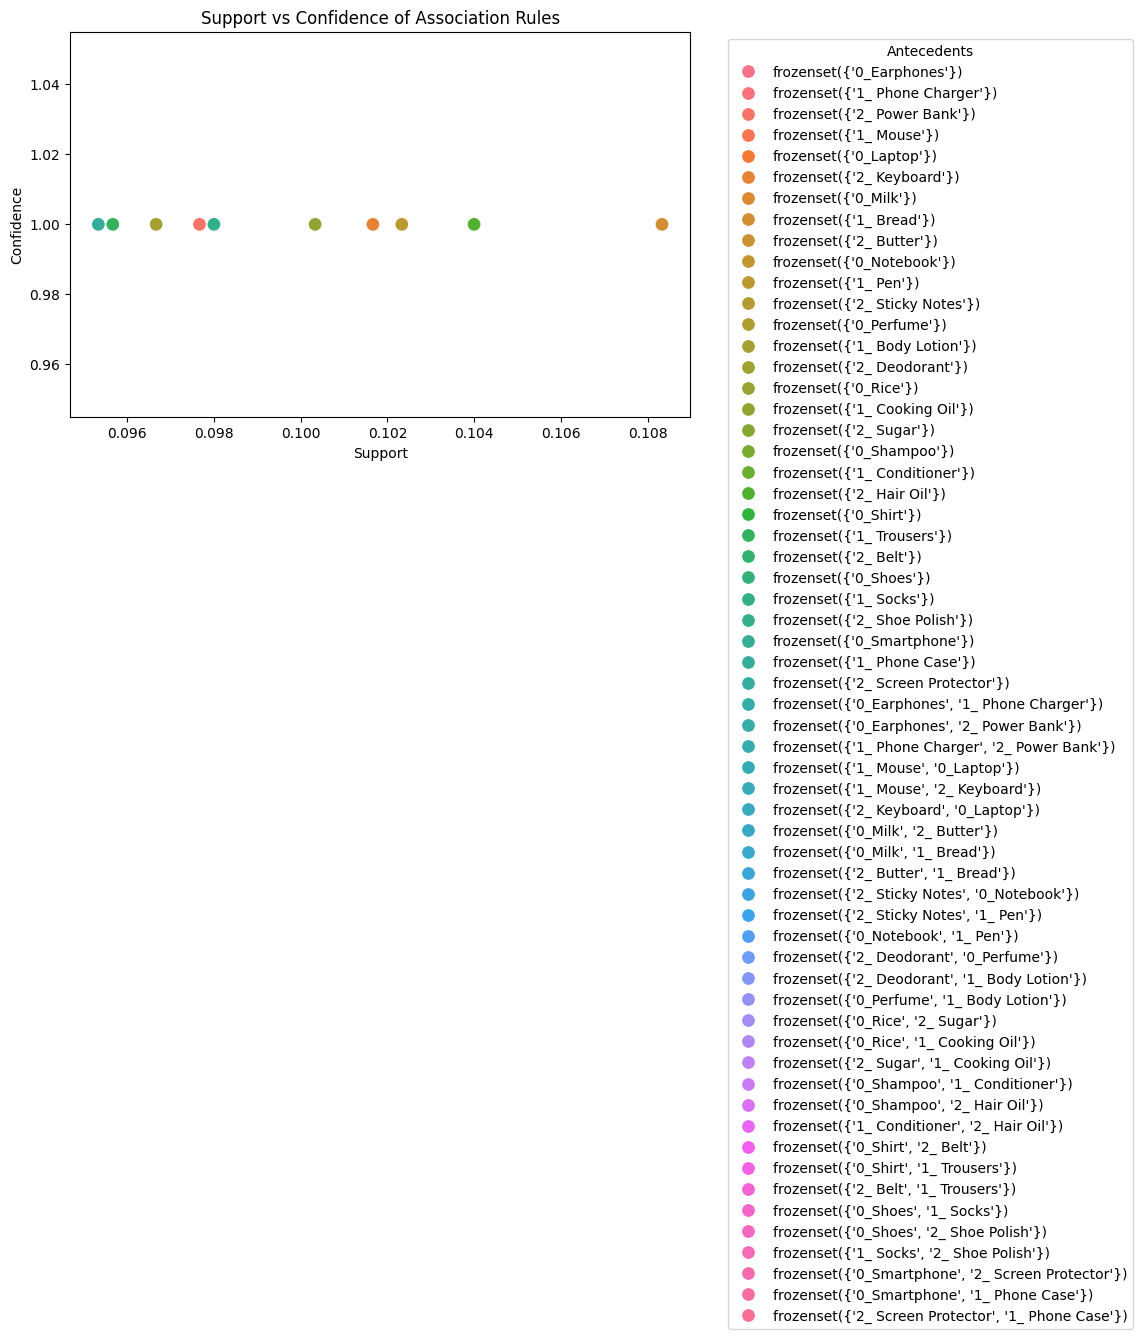

In [33]:
df_rules = pd.DataFrame(rules)

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_rules['support'], y=df_rules['confidence'], hue=df_rules['antecedents'], s=100)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence of Association Rules")
plt.legend(title="Antecedents", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

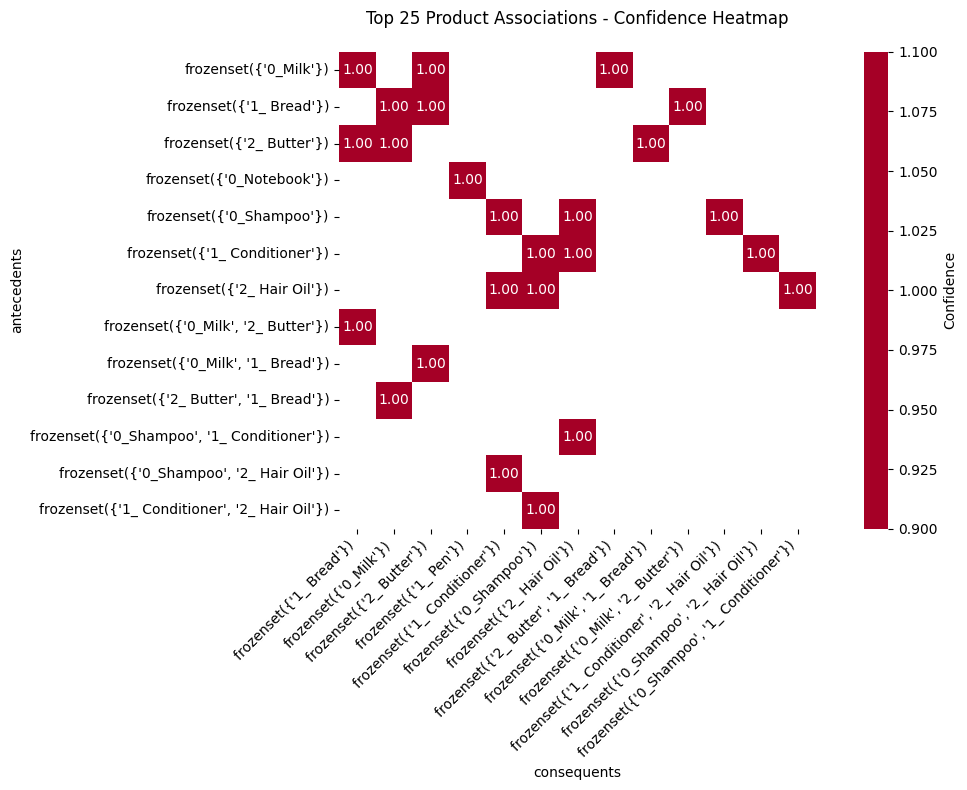

C:\Users\nexwa\AppData\Local\Temp\ipykernel_16984\3275439597.py:47: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




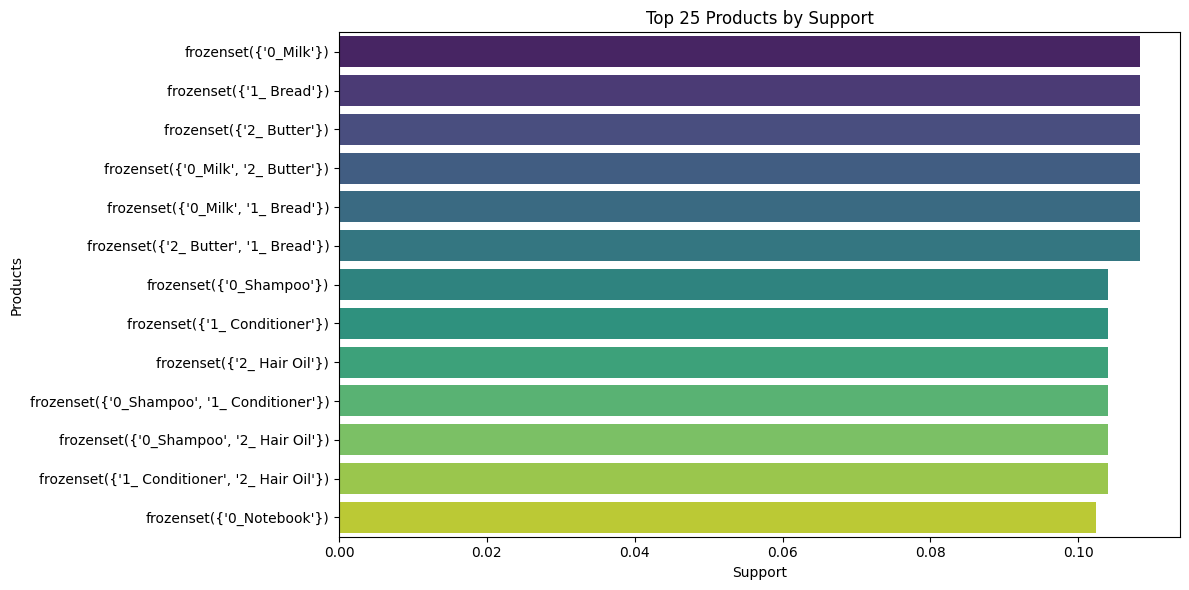


Top Product Pairs by Support:
                  antecedents                   consequents  support  confidence
                     (0_Milk)                    (1_ Bread) 0.108333         1.0
                   (1_ Bread)                      (0_Milk) 0.108333         1.0
                     (0_Milk)                   (2_ Butter) 0.108333         1.0
                  (2_ Butter)                      (0_Milk) 0.108333         1.0
                  (2_ Butter)                    (1_ Bread) 0.108333         1.0
                   (1_ Bread)                   (2_ Butter) 0.108333         1.0
          (0_Milk, 2_ Butter)                    (1_ Bread) 0.108333         1.0
           (0_Milk, 1_ Bread)                   (2_ Butter) 0.108333         1.0
        (2_ Butter, 1_ Bread)                      (0_Milk) 0.108333         1.0
                     (0_Milk)         (2_ Butter, 1_ Bread) 0.108333         1.0
                  (2_ Butter)            (0_Milk, 1_ Bread) 0.108333         1

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_rules is your DataFrame with the association rules
num_products = 25
# 1. First, let's identify top 20 products based on support
top_10_products = df_rules.nlargest(num_products, 'support')

# 2. Filter the rules to only include relationships between top products
mask = (df_rules['antecedents'].isin(top_10_products['antecedents']) & 
        df_rules['consequents'].isin(top_10_products['consequents']))
top_rules = df_rules[mask]

# 3. Create an enhanced heatmap
plt.figure(figsize=(12, 8))

# Create pivot table for top products only
pivot_table = top_rules.pivot(index="antecedents", 
                            columns="consequents", 
                            values="confidence")

# Create heatmap with improved styling
sns.heatmap(pivot_table, 
            annot=True,  # Show numbers in cells
            fmt='.2f',   # Format numbers to 2 decimal places
            cmap='RdYlBu_r',  # Red-Yellow-Blue color scheme
            center=0.5,   # Center the colormap
            square=True,  # Make cells square
            cbar_kws={'label': 'Confidence'})

# Improve readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title(f'Top {num_products} Product Associations - Confidence Heatmap', pad=20)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

# 4. Create a summary bar plot of support values
plt.figure(figsize=(12, 6))
top_products_support = df_rules.nlargest(num_products, 'support')

sns.barplot(data=top_products_support,
            x='support',
            y='antecedents',
            palette='viridis')

plt.title(f'Top {num_products} Products by Support')
plt.xlabel('Support')
plt.ylabel('Products')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# 5. Print top product pairs
print("\nTop Product Pairs by Support:")
print(top_products_support[['antecedents', 'consequents', 'support', 'confidence']]
      .to_string(index=False))

**RECOMMEDATIONS**

**Grocery Items:**

Milk, Bread, and Butter form a tight cluster
When someone buys one of these items, they're very likely to buy the others
Perfect confidence (1.0) across all these relationships
**
Personal Care Items:**

Shampoo, Conditioner, and Hair Oil show strong associations
These products are frequently bought together
Also shows perfect confidence (1.0) in their relationships


Support Bar Chart (Image 3):
Shows the most frequent product combinations:

**Top Product Groups:**

Basic groceries (Milk, Bread, Butter) have the highest support (~10%)
Hair care products (Shampoo, Conditioner, Hair Oil) also show strong support
Paired combinations (like Milk+Butter, Shampoo+Conditioner) appear frequently

**Key Business Insights:**

Product Bundling Opportunities:

Create grocery bundles with Milk, Bread, and Butter
Package hair care products together


**Store Layout Recommendations:**

Place complementary products near each other
Create dedicated sections for frequently co-purchased items


**Marketing Strategies:**

Cross-promote items with strong associations
Design promotions around common product pairs
Consider loyalty programs based on these purchase patterns


**Inventory Management:**

Stock complementary products at similar levels
Coordinate restocking of associated items
Plan for combined purchases in inventory forecasting